<a href="https://colab.research.google.com/github/N3wBaz/mipt_python/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [5]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM -q

Начнем с необходимых приготовлений.

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [7]:
# Paste your code here
coins = pd.read_csv('coins.csv')

# Переведем дату в datetime
coins['date'] = pd.to_datetime(coins['date'], infer_datetime_format=True)

Посмотрим что получилось

In [8]:
coins.head(5)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
4,2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [9]:
# Paste your code here
nuniq_coins = coins['symbol'].nunique()
print(f'В датасете представленно {nuniq_coins} уникальных монет')


В датасете представленно 66 уникальных монет


### 2. За какой период данные мы имеем? (0.4 балла)

In [10]:
# Paste your code here
period = (coins['date'].max()-coins['date'].min()).days
print(f'У нас данные за период {period} дней или {round(period / 365.2425, 2)} лет')


У нас данные за период 1865 дней или 5.11 лет


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [11]:
# Paste your code here
coins.isnull().sum()

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

In [12]:
coins[coins['txCount'].isna()].head(3)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
1816,2014-08-05,0.002976,NaN,NaN,NaN,XLM,Stellar,0.002976,0.003387,0.002349,0.002440,30316.0,772597.0
1824,2014-08-06,0.002373,NaN,NaN,NaN,XLM,Stellar,0.002373,0.003402,0.002266,0.002657,35820.0,746554.0
1832,2014-08-07,0.002686,NaN,NaN,NaN,XLM,Stellar,0.002686,0.003042,0.002455,0.002501,142864.0,976942.0


In [13]:
coins[coins['price'].isna()]['symbol'].unique()

array(['BTM', 'VEN', 'KNC'], dtype=object)

In [14]:
coins[(coins['symbol']=='XLM') & (coins['date'].dt.year > 2015)].isnull().sum()

date               0
price              0
txCount            5
txVolume           5
activeAddresses    5
symbol             0
name               0
open               0
high               0
low                0
close              0
volume             0
market             0
dtype: int64

In [15]:
coins[(coins['symbol']=='BTM')].isnull().sum()

date                0
price              26
txCount             7
txVolume           26
activeAddresses     7
symbol              0
name                0
open                0
high                0
low                 0
close               0
volume              0
market              0
dtype: int64

In [16]:
coins[(coins['symbol']=='VEN') & (coins['price'].isna())].tail(3)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
37437,2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.06,4.17,3.83,3.89,92839700.0,2.135810e+09
37507,2018-06-05,NaN,632.0,NaN,588.0,VEN,VeChain,3.89,4.15,3.80,4.09,83761900.0,2.047090e+09
37577,2018-06-06,NaN,603.0,NaN,528.0,VEN,VeChain,4.10,4.88,3.99,4.14,120559000.0,2.154240e+09


In [17]:
coins[(coins['symbol']=='VEN') & (coins['price'].isna())].tail(3)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
37437,2018-06-04,NaN,847.0,NaN,698.0,VEN,VeChain,4.06,4.17,3.83,3.89,92839700.0,2.135810e+09
37507,2018-06-05,NaN,632.0,NaN,588.0,VEN,VeChain,3.89,4.15,3.80,4.09,83761900.0,2.047090e+09
37577,2018-06-06,NaN,603.0,NaN,528.0,VEN,VeChain,4.10,4.88,3.99,4.14,120559000.0,2.154240e+09


In [18]:
coins[(coins['symbol']=='VEN') & (coins['price'].isna())].isnull().sum()

date                 0
price              289
txCount              0
txVolume           289
activeAddresses      0
symbol               0
name                 0
open                 0
high                 0
low                  0
close                0
volume               0
market               0
dtype: int64

In [19]:
# Думаю пропуски связаны в основном с отсутсвием опеределенных монет на рынке.
# Например XLM показаная выше, почти все свои пропуски имеет на промежутке до 2015 года, а по найденой мной информации
# эта монета начала торговаться где то в это время. Скорее всего транзакции этой монеты еще не совершались,
# вот эти графы и не заполнены.
# Для монеты VEN нашел информацию что она торгуется с июля 2018 года. Думаю что пропуски связаны с тестовым режимом или чем то подобным.
# Потому что после начала торгов, все пропусков нет.

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [20]:
# Paste your code here
highest_coin = coins[coins['price'] == coins['price'].max()]
name = highest_coin['name'].values[0]
date = highest_coin['date'].dt.strftime('%Y-%m-%d').values[0]
price = highest_coin['price'].values[0]

print(f"Монета с названием {name} в {date} имела цену {price}")

Монета с названием Bitcoin в 2017-12-17 имела цену 19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

In [21]:
# Paste your code here
data = coins.groupby('symbol')['market'].mean().sort_values(ascending=False)
top_10 = data[:9]
other = data[9:]

In [22]:
print(f"Самая высокая капитализация у монеты {data.index[0]} в размере {data[0]:.2f}, а самая низкая у монеты {data.index[-1]} в размере {data[-1]:.2f}")

Самая высокая капитализация у монеты BTC в размере 30782136351.02, а самая низкая у монеты VTC в размере 28203506.20


In [23]:
top_10_names = top_10.index.to_list()
top_10_values = [*top_10.values]
top_10_names.append('other coins')
top_10_values.append(other.sum())

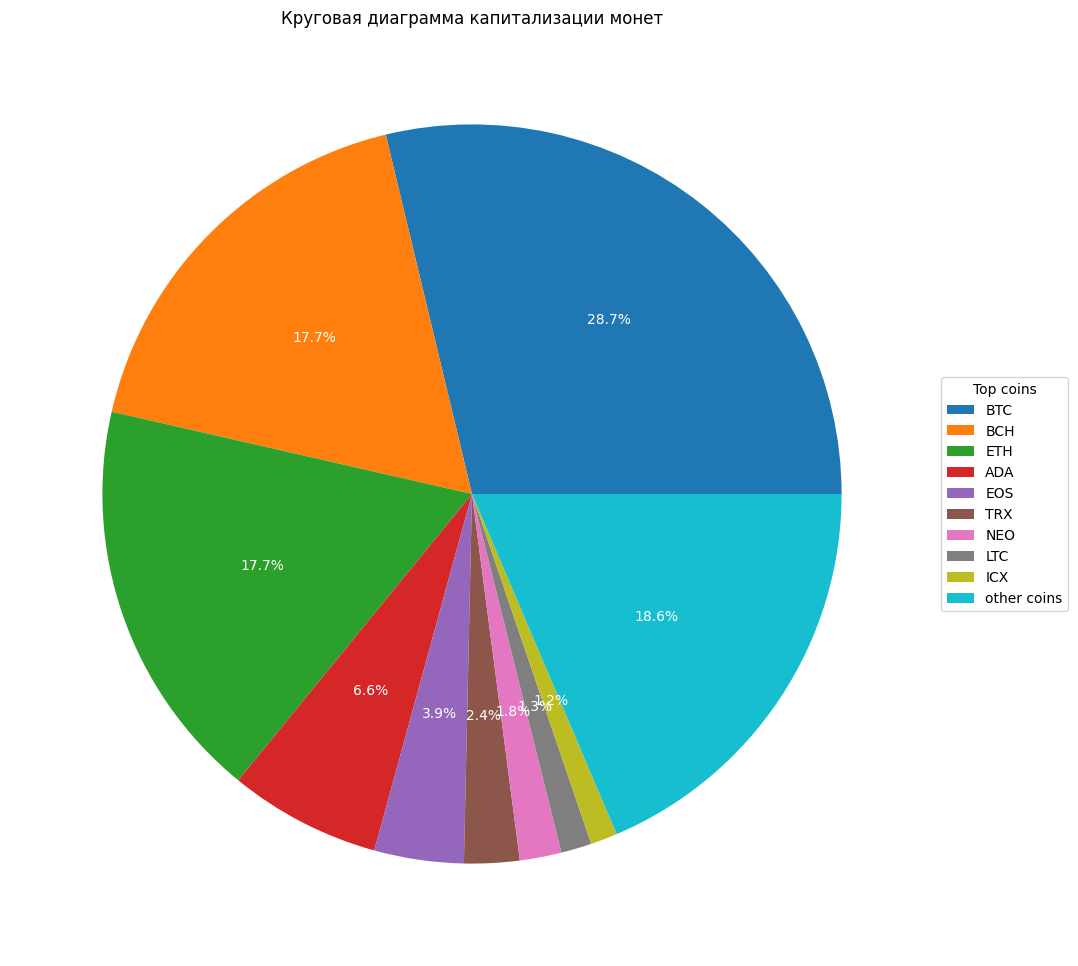

In [24]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

wedges, _, autotexts = ax.pie(top_10_values, autopct=lambda pct: func(pct, top_10_values),
                                  textprops=dict(color="w"))

ax.legend(wedges, top_10_names,
          title="Top coins",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="light")

ax.set_title("Круговая диаграмма капитализации монет")

plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [25]:
!pip install mpl_finance -q

In [26]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [27]:
def plot_fancy_price_action(coins, symbol, start_date=None, end_date=None):
    if start_date == None:
        start_date = coins['date'].iloc[0]
    if end_date == None:
        end_date = coins['date'].iloc[-1]

    small_coin = coins.loc[(coins['date'] >= start_date) & \
     (coins['date'] <= end_date) & (coins['symbol']==symbol), \
      ['date','open', 'high', 'low', 'close']]
    small_coin['date'] = pd.to_datetime(small_coin['date'])
    small_coin['date'] = small_coin['date'].apply(mpl_dates.date2num)
    small_coin = small_coin.astype(float)

    title = f"График криптовалюты {symbol} с {start_date} по {end_date}"

    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot()

    candlestick_ohlc(ax, small_coin.values, width=0.6,
                 colorup='green', colordown='red', alpha=0.8)
    plt.grid()
    date_format = mpl_dates.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()
    plt.xticks(rotation = 0)
    ax.set_xlabel('Дата', size = 15)
    ax.set_ylabel('Цена',size = 15)
    plt.title(title)
    plt.show()

        # Paste your code here

Посмотрим, что получилось:

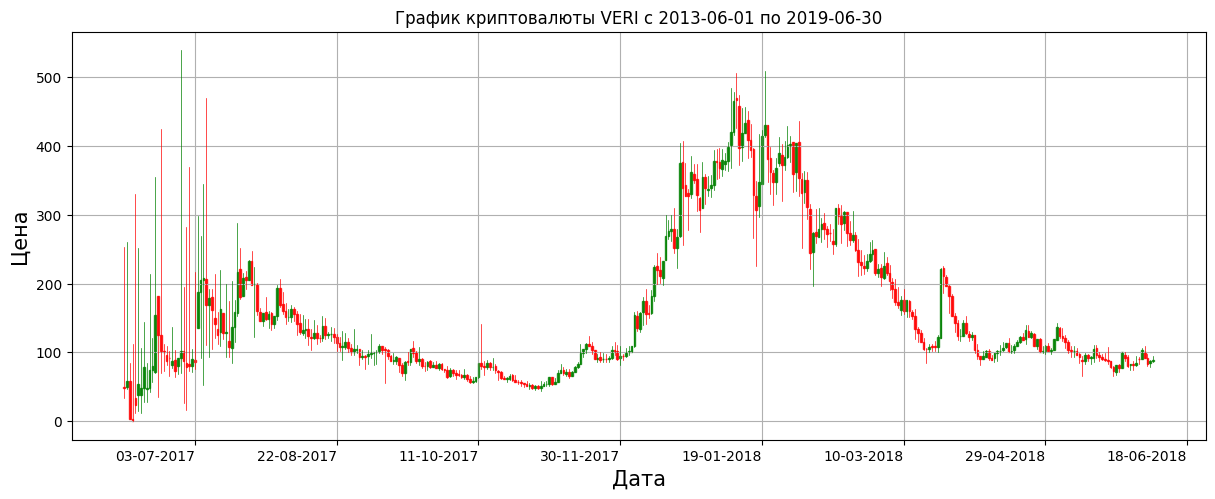

In [28]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [29]:
coins['pnd'] = coins['high']/coins[['open', 'close']].max(axis=1)

In [30]:
def find_most_severe_pump_and_dump(coins, symbol=None, start_date=None, end_date=None):

    if start_date == None:
        start_date = coins['date'].iloc[0]
    if end_date == None:
        end_date = coins['date'].iloc[-1]

#     coins['pnd'] = coins['high']/coins[['open', 'close']].max(axis=1)
    small_coin = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]
    pnd_date_str = small_coin[small_coin['pnd'] == small_coin['pnd'].max(axis=0)]['date'].dt.strftime('%Y-%m-%d').values[0]
    pnd_symbol = small_coin[small_coin['pnd'] == small_coin['pnd'].max(axis=0)]['symbol'].values[0]
    pnd = small_coin[small_coin['pnd'] == small_coin['pnd'].max(axis=0)]['pnd'].values[0]
    print(f"Дата : {pnd_date_str}, символ монеты : {pnd_symbol}, величина pump'n'dump : {pnd.round(3)}")

    return pnd_date_str, pnd_symbol, pnd.round(3)

In [31]:
e = find_most_severe_pump_and_dump(coins)

Дата : 2017-06-11, символ монеты : VERI, величина pump'n'dump : 33.549


Сравните эти значения для разных монет:

In [32]:
# Ниже представлены 10 самых накачиваемых монет за все время.

top_10_pnd = coins['pnd'].sort_values(ascending=False).index
test = coins.iloc[top_10_pnd][['date', 'symbol', 'pnd']]
test.drop_duplicates(subset=['symbol'])[:10]

,date,symbol,pnd
17063,2017-06-11,VERI,33.549254
758,2014-02-27,DGB,32.119149
17544,2017-06-29,FUN,12.490562
20776,2017-09-16,TRX,9.651010
31626,2018-03-13,BTM,7.177933
30284,2018-02-21,BTG,5.777033
21887,2017-10-08,RHOC,5.075208
5810,2015-09-17,DASH,4.782427
21106,2017-09-23,LRC,4.528409
10664,2016-08-18,PIVX,4.384741


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [33]:
def compute_roi(coins, investments, start_date, end_date):

    gold_start = 0
    gold_end = 0

    for _, symbol in enumerate(investments):

        number = investments[symbol]
        price_start = coins[(coins['symbol'] == symbol) & (coins['date'] == start_date)]['price'].values[0]
        price_end = coins[(coins['symbol'] == symbol) & (coins['date'] == end_date)]['price'].values[0]
        gold_start += price_start * number
        gold_end += price_end * number
    roi = (gold_end - gold_start)/gold_start

    return roi

In [34]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [35]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [36]:
def plot_bollinger_bands(coins, symbol, window, width):

    title = f"График криптовалюты {symbol} с полосами Боллинджера"
    stock_price = coins[(coins['symbol']==symbol)]

    rolling_mean = stock_price['price'].rolling(window=window).mean()
    rolling_std  = stock_price['price'].rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std*width)
    lower_band = rolling_mean - (rolling_std*width)

    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot()

    plt.plot(stock_price['date'], stock_price['price'], label = symbol)
    plt.plot(stock_price['date'], rolling_mean, label = 'rolling mean')
    plt.plot(stock_price['date'], upper_band.values, label = 'upper band' )
    plt.plot(stock_price['date'], lower_band.values, label = 'lower band')

    ax.set_xlabel('Дата', size = 15)
    ax.set_ylabel('Цена',size = 15)
    fig.tight_layout()

    plt.grid()
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

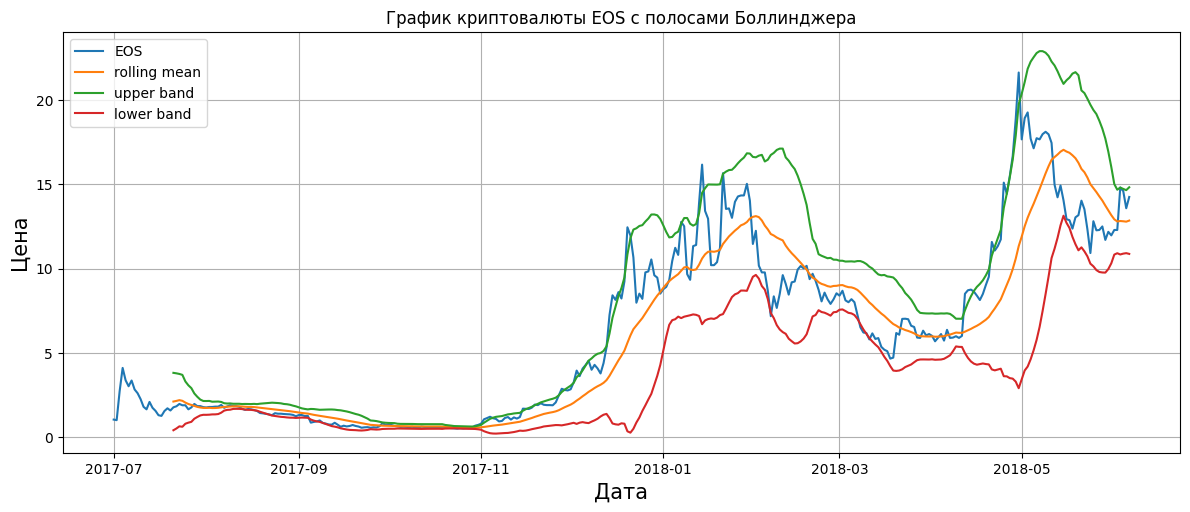

In [37]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

Так как в полосах Боллинжера используются скользящие средние, то полосы рассчитываются с запаздывание на ширину окна. Видно, что при быстром движении цены, она выходила за пределы полос.
В целом, этот индикатор выдает сигналы к покупке или продаже, но за счет запаздывания они могут быть не актуальны.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [38]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig, axs = plt.subplots(2, 1, figsize=(12, 4))
    plt.subplots_adjust(left=None, bottom=1, right=None, top=3, wspace=None, hspace=None)


    new_coins = coins.loc[coins['date']>='2017-07-01']
    capital = new_coins.groupby(['date']).agg(['sum'])['market'].reset_index()

    for symbol in symbols:

        market_value = new_coins.loc[new_coins['symbol']==symbol, ['market', 'date']]
        market_value = pd.merge(market_value, capital, how='left', left_on='date', right_on='date')
        axs[0].plot(market_value['date'],  market_value['market'], label = symbol)
        axs[1].plot(market_value['date'],  market_value['market']/market_value['sum'], label = symbol)


    title1 = "Капитализации монет"
    title2 = "Доля в капитализации монет"
    axs[0].set_xlabel('дата', size = 10)
    axs[0].set_ylabel('капитализация',size = 10)
    axs[0].set_xticks(market_value['date'][::market_value.shape[0]//10])
    axs[1].set_xlabel('дата', size = 10)
    axs[1].set_ylabel('капитализация',size = 10)
    axs[1].set_xticks(market_value['date'][::market_value.shape[0]//10])

    axs[0].xaxis.set_tick_params(labelsize=8)
    axs[1].xaxis.set_tick_params(labelsize=8)

    axs[0].grid()
    axs[1].grid()
    axs[1].title.set_text(title2)
    axs[0].title.set_text(title1)
    axs[0].legend(loc='upper right')
    axs[1].legend(loc='upper right')

    plt.show()
    # Paste your code here



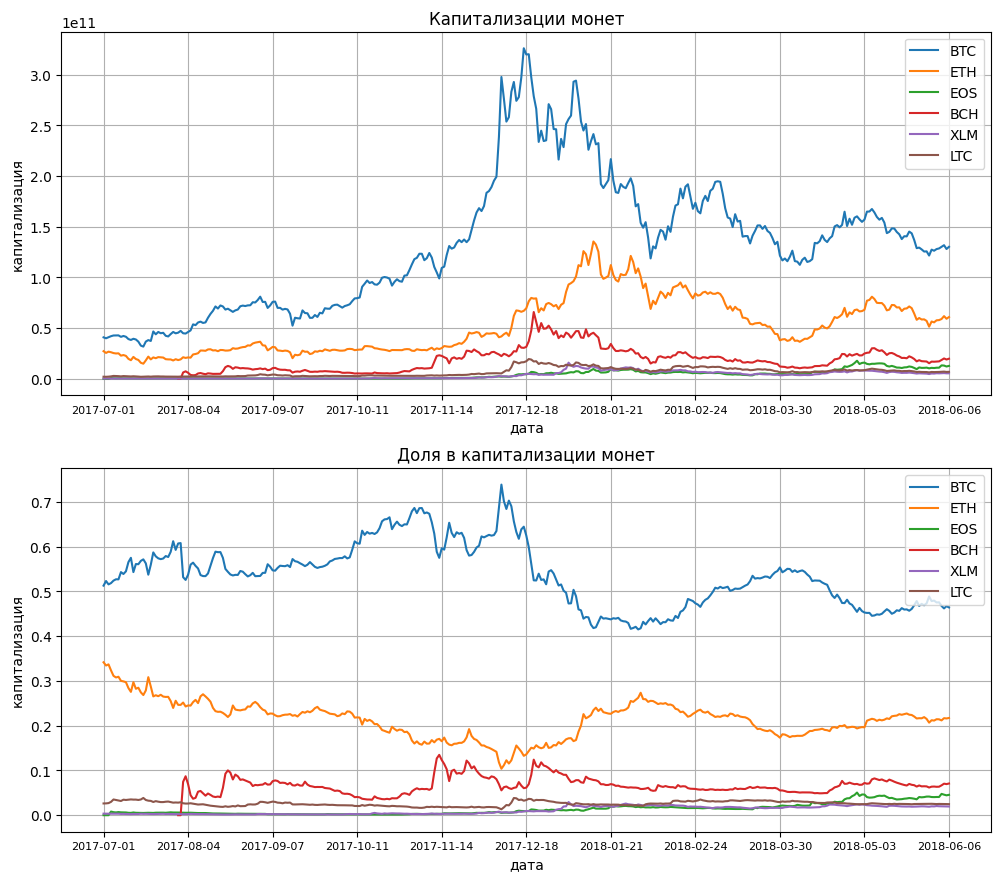

In [39]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

Думаю связано с тем, что при росте популярности биткоина больше людей рассматривали криптовалюты как финансовый инструмент и проявляли интерес. Видно, что все криптовалюты коррелируют с поведением биткоина. А то, что доля в общей капиталазации колеблется в коридоре означает, что рос общий интерес в рынку криптовалют, и росла как общая капитализация рынка, так и капитализация отдельный криптовалют.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [40]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    stock_price = coins.loc[(coins['symbol'].isin(symbols)) & (coins['date']<=date)]
    capital = stock_price[['date', 'market']].groupby(['date']).sum().reset_index()
    capital.columns = ['date', 'market_all']
    stock_price = stock_price.merge(capital, how='left', on='date')

    stock_price['ratio'] = stock_price['market'] / stock_price['market_all']
    stock_price = stock_price.set_index(['date', 'symbol']).ratio.unstack().reset_index().fillna(0)
    new_symbols = list(set(stock_price.columns.values) & set(symbols))
    date = stock_price[['date']]
#     rolling_mean = stock_price[new_symbols].rolling(window=window).mean()
    smoothed_data = stock_price[new_symbols].ewm(alpha=alpha, min_periods=window).mean()
    # new_coins = pd.concat([date, smoothed_data], axis = 1).dropna().reset_index(drop = True)

    return smoothed_data.corr()
    # Paste your code here

In [41]:
# FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)
# Замена на format
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-41-b6d9ccd5a44f>:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,LTC,EOS,ETH,BTC,BCH,XLM,ADA
symbol,,,,,,,
LTC,1.00,0.08,-0.16,0.02,0.02,0.02,0.08
EOS,0.08,1.00,0.53,-0.70,0.71,0.89,0.82
ETH,-0.16,0.53,1.00,-0.96,0.65,0.58,0.51
BTC,0.02,-0.70,-0.96,1.00,-0.81,-0.74,-0.70
BCH,0.02,0.71,0.65,-0.81,1.00,0.72,0.78
XLM,0.02,0.89,0.58,-0.74,0.72,1.00,0.93
ADA,0.08,0.82,0.51,-0.70,0.78,0.93,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [42]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
# .format(precision=2)

<ipython-input-42-909b2918f362>:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations.style.background_gradient(cmap='coolwarm').set_precision(2)


symbol,LTC,EOS,ETH,BTC,BCH,XLM,ADA
symbol,,,,,,,
LTC,1.00,-0.01,-0.25,0.12,-0.07,-0.27,-0.04
EOS,-0.01,1.00,0.58,-0.70,0.78,0.39,0.69
ETH,-0.25,0.58,1.00,-0.97,0.50,0.44,0.24
BTC,0.12,-0.70,-0.97,1.00,-0.66,-0.45,-0.37
BCH,-0.07,0.78,0.50,-0.66,1.00,0.32,0.67
XLM,-0.27,0.39,0.44,-0.45,0.32,1.00,0.39
ADA,-0.04,0.69,0.24,-0.37,0.67,0.39,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

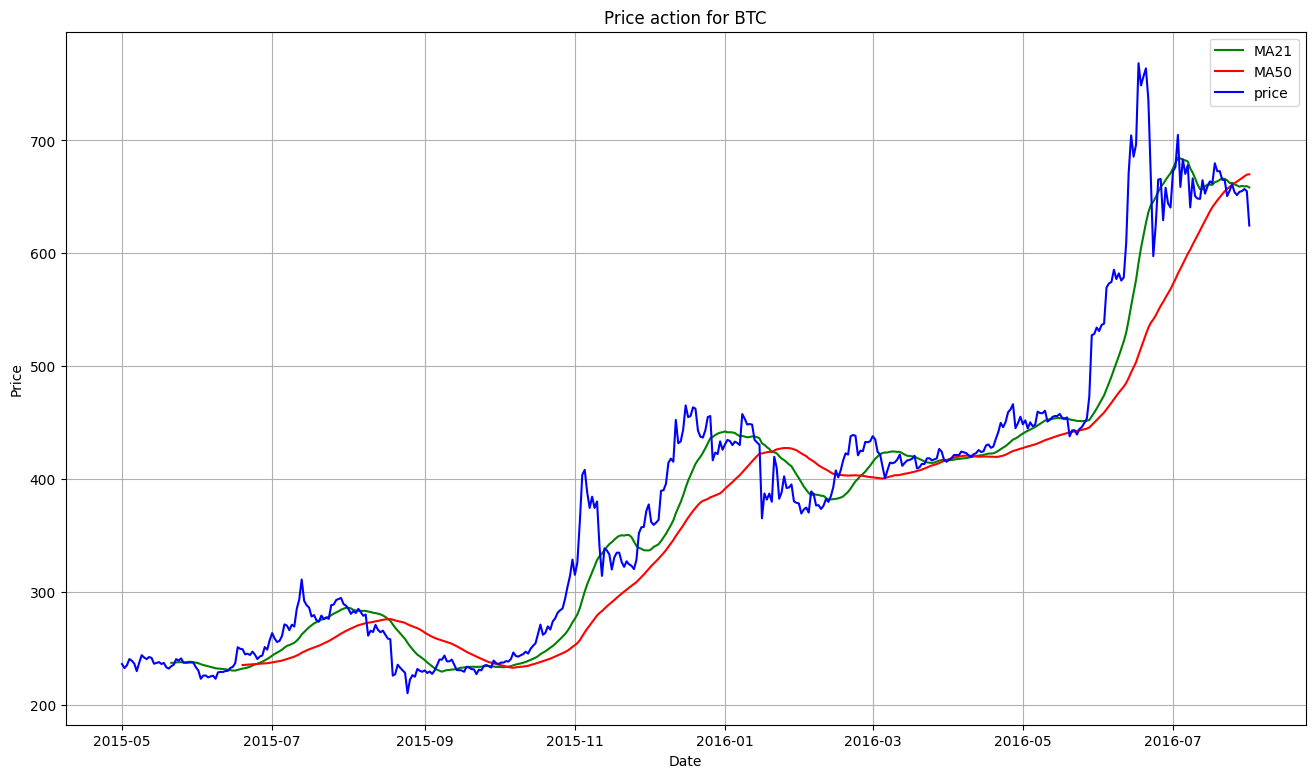

In [43]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):

    coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(coin['date'], leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(coin['date'], lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(coin['date'], price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2015-05-01',
    end_date='2016-08-01')



Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [44]:
symbol='BTC'
leading_window=21
lagging_window=50
start_date='2016-01-01'
end_date='2018-08-01'
threshold = 0.02
number = 100

coin = coins[(coins['symbol'] == symbol) & (coins['date'] >= start_date) & (coins['date'] <= end_date)]

price = coin['price']
leading_mean = price.rolling(window=leading_window).mean()
lagging_mean = price.rolling(window=lagging_window).mean()
strategy = pd.DataFrame(coin[['date', 'price', 'close']])
strategy['MA_low'] = lagging_mean
strategy['MA_high'] = leading_mean
strategy['multiplier'] = strategy['close'] / strategy['close'].shift(1)
strategy ['buy'] = ((strategy['MA_high'] - strategy['MA_low'])/strategy['price'] > threshold)
strategy ['sell'] = ((strategy['MA_low'] - strategy['MA_high'])/strategy['price'] > threshold)
strategy['portfolio1'] = number * strategy['price']
# strategy['portfolio2'] = number * strategy['price']

In [45]:
strategy.tail(30)

,date,price,close,MA_low,MA_high,multiplier,buy,sell,portfolio1
35503,2018-05-08,9380.87,9234.82,8281.8424,9110.552381,0.985257,True,False,938087.0
35572,2018-05-09,9223.73,9325.18,8293.9236,9171.471429,1.009785,True,False,922373.0
35641,2018-05-10,9325.96,9043.94,8301.6932,9227.028095,0.969841,True,False,932596.0
35711,2018-05-11,9052.96,8441.49,8303.9636,9263.508095,0.933386,True,False,905296.0
35781,2018-05-12,8441.44,8504.89,8298.0674,9244.110476,1.007511,True,False,844144.0
35851,2018-05-13,8515.49,8723.94,8290.3382,9224.607143,1.025756,True,False,851549.0
35921,2018-05-14,8713.10,8716.79,8292.3440,9220.736190,0.999180,True,False,871310.0
35991,2018-05-15,8705.19,8510.38,8296.4784,9209.824286,0.976320,True,False,870519.0
36061,2018-05-16,8504.41,8368.83,8302.5666,9152.842381,0.983367,True,False,850441.0
36131,2018-05-17,8370.05,8094.32,8313.2310,9129.162857,0.967199,True,False,837005.0


In [46]:
# strategy['buy'][50:70]-strategy['buy'][50:70].shift(1)

In [47]:
# strategy['buy'][50:70]

In [48]:
# strategy['buy'][50:70].shift(1)

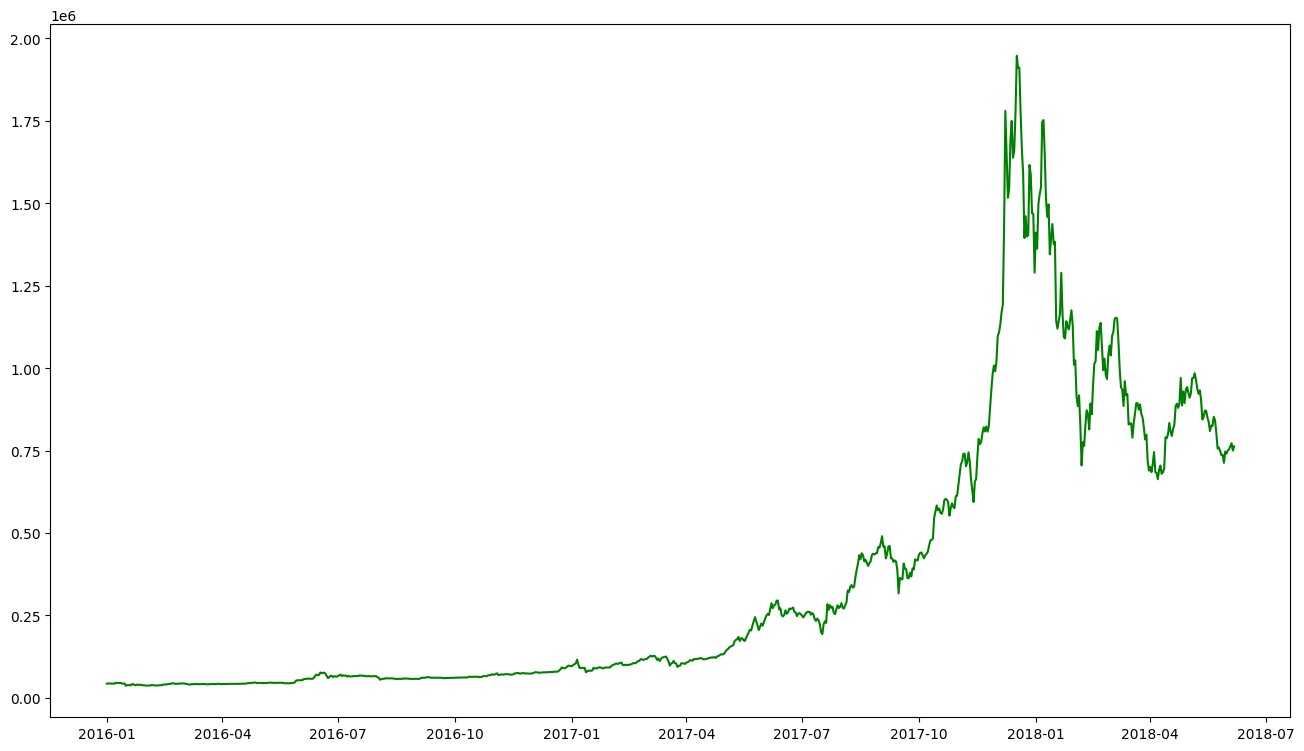

In [49]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111)


ax.plot(strategy['date'], strategy['portfolio1'], color='green', label='MA{}'.format(leading_window))
# ax.plot(coin['date'], lagging_mean, color='red', label='MA{}'.format(lagging_window))
# ax.plot(coin['date'], price, color='blue', label='price')
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.legend(loc='best')
# ax.grid(True)
plt.show()

In [50]:
# strategy.reset_index(drop = True)
strategy.tail(20)

,date,price,close,MA_low,MA_high,multiplier,buy,sell,portfolio1
36201,2018-05-18,8091.83,8250.97,8315.4862,9072.077143,1.019353,True,False,809183.0
36271,2018-05-19,8255.73,8247.18,8337.1718,9039.527619,0.999541,True,False,825573.0
36341,2018-05-20,8246.99,8513.25,8364.2620,8987.174286,1.032262,True,False,824699.0
36410,2018-05-21,8522.33,8418.99,8394.6474,8944.137143,0.988928,True,False,852233.0
36479,2018-05-22,8419.87,8041.78,8426.1476,8904.537143,0.955195,True,False,841987.0
36549,2018-05-23,8037.08,7557.82,8444.8440,8853.702857,0.939819,True,False,803708.0
36619,2018-05-24,7561.12,7587.34,8446.9382,8774.043333,1.003906,True,False,756112.0
36689,2018-05-25,7592.30,7480.14,8461.8112,8673.890952,0.985871,True,False,759230.0
36758,2018-05-26,7486.48,7355.88,8475.2216,8568.471905,0.983388,False,False,748648.0
36827,2018-05-27,7362.08,7368.22,8489.8530,8450.222857,1.001678,False,False,736208.0


In [ ]:
# Вывел только сигналы на покупку и продажу

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.